In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

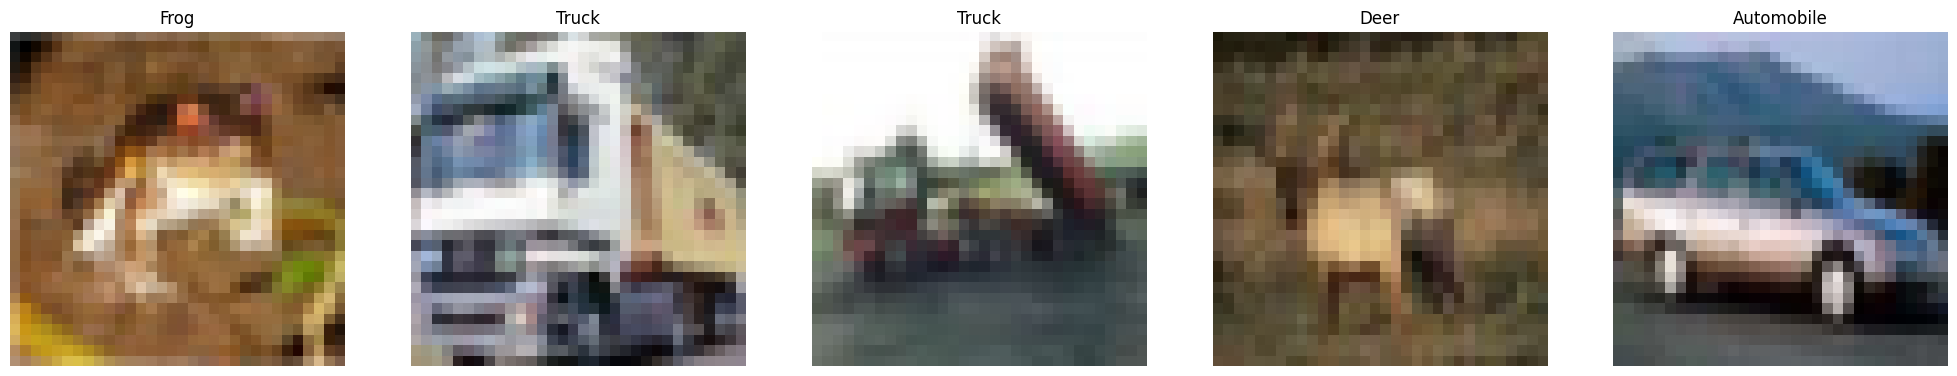

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

fig, axes = plt.subplots(1, 5, figsize=(25, 20))

for i in range(5):
    axes[i].imshow(x_train[i])
    label = class_labels[int(y_train[i])]
    axes[i].set_title(label)
    axes[i].axis("off")

plt.show()

In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Data Augmentation

In [4]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

datagen.fit(x_train)

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.0001, weight_decay=1e-6),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(datagen.flow(x_train, y_train, batch_size=512),
                    epochs=10,
                    validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [6]:
# %% Test model and evaluate performance
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

313/313 [==============================] - 9s 29ms/step
              precision    recall  f1-score   support

    Airplane       0.57      0.46      0.51      1000
  Automobile       0.57      0.59      0.58      1000
        Bird       0.39      0.15      0.22      1000
         Cat       0.32      0.19      0.24      1000
        Deer       0.43      0.29      0.34      1000
         Dog       0.35      0.55      0.43      1000
        Frog       0.45      0.60      0.52      1000
       Horse       0.42      0.60      0.49      1000
        Ship       0.60      0.46      0.52      1000
       Truck       0.43      0.64      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



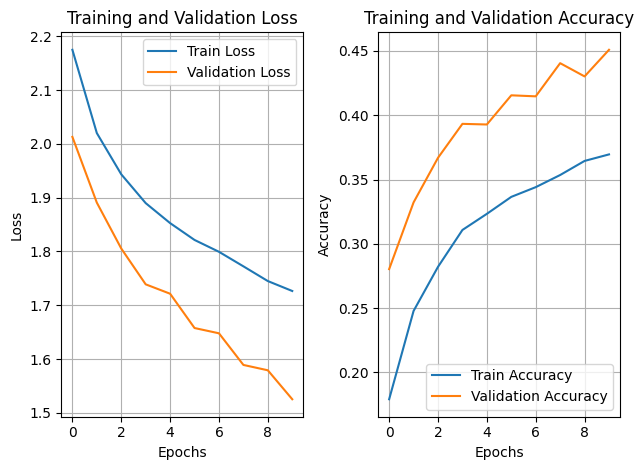

In [7]:
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()